#**Matrix Multiplication**

In [ ]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %clear  %colors  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %pip  %popd  %pprint  %precision  %profile  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %shell  %store  %sx  %system  %tb  %tensorflow_version  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%bigquery  %%capture  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%perl 

In [ ]:
%%writefile ss.cpp


#include <stdlib.h>
#include <stdio.h>
#include <sys/time.h>
#include <omp.h>

#define tile_size 64
#define MIN(a,b) (((a)<(b))?(a):(b))
#define SEED 0

void matrix_multiplication(double ** a, double ** b, double ** d,int n)
{
	double sum;
	for (int i = 0; i < n; i++){
		for (int j = 0; j < n; j++){
				d[i][j] = 0;
			for (int k = 0; k < n; k++){
					d[i][j] += a[i][k] * b[k][j];
			}
		}
	}
}

double **create_matrix(int n) {
	int i,j;
	double **a;
	a = (double**) malloc(sizeof(double*)*n);
	for (i=0;i<n;i++) {
		a[i] = (double*) malloc(sizeof(double)*n);
	}
	srand(SEED);
	for (i=0;i<n;i++) {
		for (j=0;j<n;j++) {
			a[i][j] = rand()%10;
		}
	}
	return a;
}

void free_matrix(double **a, int n) {
	int i;
	for (i=0;i<n;i++) {
		free(a[i]);
	}
	free(a);
}

int main(int argc, char *argv[]) {
  
  int n;
  if(argc != 2){
      printf("IMproper Arguments!!");
      exit(0);
  }
  
  n = atoi(argv[1]);

	struct timeval  TimeValue_Start;
  struct timezone TimeZone_Start;

  struct timeval  TimeValue_Final;
  struct timezone TimeZone_Final;
  long            time_start, time_end;
  double          time_overhead;
	int i,j,k,ii,jj,kk,sum;

	double **A, **B, **C, **D;
	double t1,t2,t3,t4;
         
	A = create_matrix(n);
	B = create_matrix(n);
	C = (double**) malloc(sizeof(double*)*n);
        for (i=0;i<n;i++) {
                C[i] = (double*) malloc(sizeof(double)*n);
        }
  D = (double**) malloc(sizeof(double*)*n);
        for (i=0;i<n;i++) {
                D[i] = (double*) malloc(sizeof(double)*n);
        }

	for(i=0; i<n; i++) 
  {
		for(j=0; j<n; j++)
    {
			C[i][j] = 0.0;
      D[i][j] = 0.0;
    }
	}


 gettimeofday(&TimeValue_Start, &TimeZone_Start);
 matrix_multiplication(A,B,D,n);
 gettimeofday(&TimeValue_Final, &TimeZone_Final);
 time_start = TimeValue_Start.tv_sec * 1000000 + TimeValue_Start.tv_usec;
 time_end = TimeValue_Final.tv_sec * 1000000 + TimeValue_Final.tv_usec;
 time_overhead = (time_end - time_start)/1000000.0;
     

 printf("\n\t........................................................................\n");
 printf(" \t          Matrix Multiplication (Serial VS Tiled)                          ");
 printf("\n\t........................................................................\n");


 printf("\n\n\t\t Matrix into Matrix Multiplication (Serial) ......Done \n");
 printf("\n\t\t Time in Seconds (T)        : %lf Seconds \n",time_overhead);
 printf("\n\t\t ( T represents the Time taken for computation )");


	gettimeofday(&TimeValue_Start, &TimeZone_Start);
	#pragma omp parallel for private(jj,kk,i,j,k,sum) 
	for (ii = 0; ii<n; ii+=tile_size) {
      for (jj = 0; jj<n; jj+=tile_size) {
	        for(kk = 0; kk<n; kk+=tile_size) {
              for (i = ii; i < MIN(ii+tile_size,n); i++) {
                  for (j = jj; j < MIN(jj+tile_size,n); j++) {
		                sum = 0;
                    for (k = kk; k < MIN(kk+tile_size,n); k++) 
                      {
                       sum += A[i][k] * B[k][j];
                       }
		                C[i][j]+= sum;
	                 }
                 }
              }
            }
         }
	  gettimeofday(&TimeValue_Final, &TimeZone_Final);
  	time_start = TimeValue_Start.tv_sec * 1000000 + TimeValue_Start.tv_usec;
    time_end = TimeValue_Final.tv_sec * 1000000 + TimeValue_Final.tv_usec;
    time_overhead = (time_end - time_start)/1000000.0;
     
    printf("\n\n\t\t Matrix into Matrix Multiplication (Tiled) ......Done \n");
    printf("\n\t\t Time in Seconds (T)        : %lf Seconds \n",time_overhead);
    printf("\n\t\t ( T represents the Time taken for computation )");
    printf("\n\t\t..........................................................................\n");

  for(int i = 0;i<n;i++)
    for(int j =0;j<n;j++){
        if(C[i][j] != D[i][j]){
            printf("Failed");
            exit(0);
          }
        }
    

  printf("Done Checking : Both Computations are same!! ");
	free_matrix(A,n);
	free_matrix(B,n);
	free_matrix(C,n);
 	free_matrix(D,n);

	return 0;
}


Writing ss.cpp


In [ ]:
%%shell
g++ -fopenmp ss.cpp -o out

In [ ]:
%%shell

./out 256


	........................................................................
 	          Matrix Multiplication (Serial VS Tiled)                          
	........................................................................


		 Matrix into Matrix Multiplication (Serial) ......Done 

		 Time in Seconds (T)        : 0.125315 Seconds 

		 ( T represents the Time taken for computation )

		 Matrix into Matrix Multiplication (Tiled) ......Done 

		 Time in Seconds (T)        : 0.086112 Seconds 

		 ( T represents the Time taken for computation )
		..........................................................................
Done Checking : Both Computations are same!! 

## Analysis 

In [ ]:
serial = [0.000001,
0.000000 ,
0.000003 ,
0.000036 ,
0.000164 ,
0.002516 ,
0.011201 ,
0.112253 ,
1.488146 ,
12.283523 ,
151.039676,
1505.435873, 
7659.253458
]

parallel = [0.000115 ,
0.000087 ,
0.000079 ,
0.001978 ,
0.000379 ,
0.002136 ,
0.011197 ,
0.075235 ,
0.695457 ,
5.515929 ,
42.364133 ,
381.263239 ,
2516.833489,
]

In [ ]:
speed_up = [serial[i]/parallel[i] for i in range(len(parallel))]

In [ ]:
num_nodes = [2,4,8,16,32,64,128,256,512,1024,2048,4096,8192]

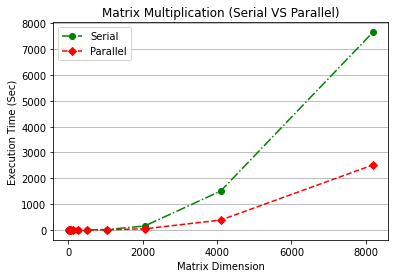

In [ ]:
import matplotlib.pyplot as plt


plt.plot(num_nodes,serial,'-.o',color='green',label='Serial')
plt.plot(num_nodes,parallel,'--D',color='red',label='Parallel')
plt.grid(axis = 'y')
plt.xlabel('Matrix Dimension')
plt.ylabel('Execution Time (Sec)')
plt.title('Matrix Multiplication (Serial VS Parallel)')
plt.legend(loc="upper left")


Text(0, 0.5, 'Speed Up')

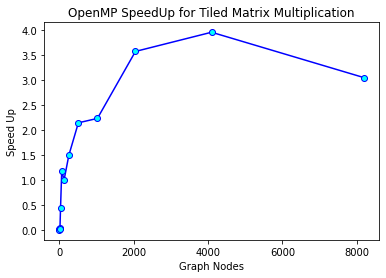

In [ ]:
plt.plot(num_nodes,speed_up,'-o',color='blue', mfc='cyan')
plt.title('OpenMP SpeedUp for Tiled Matrix Multiplication')
plt.xlabel('Graph Nodes')
plt.ylabel('Speed Up')